# Import Libaries & Load dataset

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

data = pd.read_csv('C:/Users/kgonzales21/Downloads/IE things/IE things/Datasets/California Housing Dataset.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Explore/Inspect dataset

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [121]:
data['ocean_proximity'].value_counts()

# Majority of the houses are just 1 hour away from the ocean

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [122]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Visualization

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

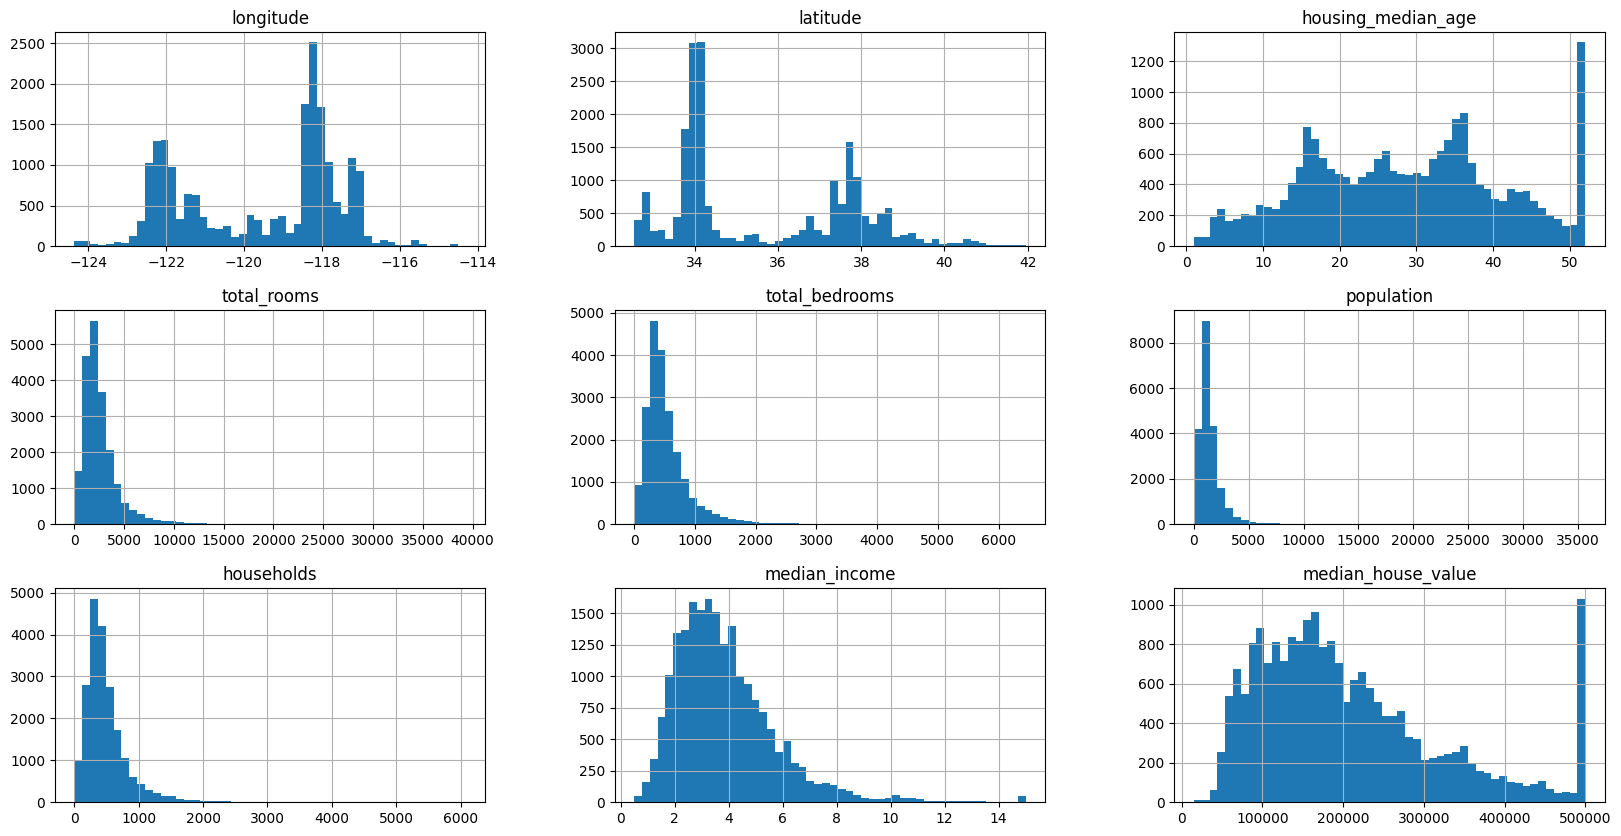

In [123]:
visual = data.hist(bins=50, figsize=(20,10))
visual

# Validation - Train/Test split (Random Sampling)

In [124]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [125]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [126]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: xlabel='median_income', ylabel='Count'>

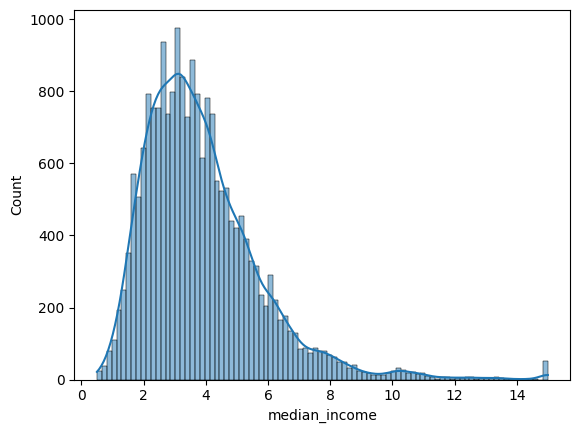

In [127]:
sns.histplot(data['median_income'], kde=True)

# In this case, we assume that the feature 'median_income' is relevant. We plotted it into a histogram to see the distribution

In [128]:
data['median_income'].agg(['skew', 'kurtosis']).transpose()

skew        1.646657
kurtosis    4.952524
Name: median_income, dtype: float64

# Convert continuous feature into attribute for Stratified sampling

In [129]:
data['Income_categories'] = pd.cut(data['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
data['Income_categories'].head()

0    5
1    5
2    5
3    4
4    3
Name: Income_categories, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [130]:
data['Income_categories'].value_counts()

Income_categories
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

Bracket 3 as the most dominant Income Category

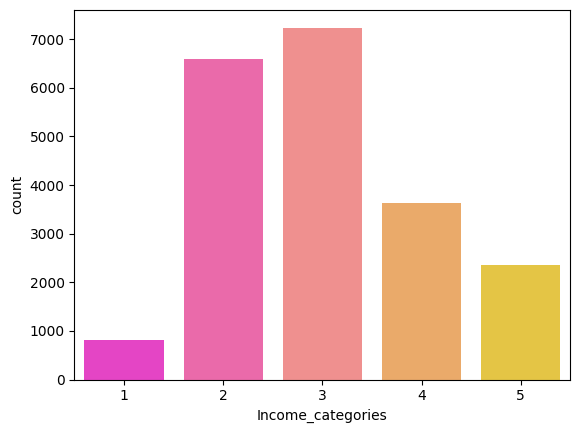

In [131]:
sns.countplot(x='Income_categories', data=data, palette='spring')
plt.show()

# Validation - Train/Test split (Stratified Sampling)

### Stratified Shuffle Split

In [132]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['Income_categories']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [133]:
stratified = strat_test_set['Income_categories'].value_counts() / len(strat_test_set)
stratified

Income_categories
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

### Incomde Categories split in the full data

In [134]:
Overall = data['Income_categories'].value_counts() / len(data)
Overall

Income_categories
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

### Train / Test Split

In [135]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
Random = test_set['Income_categories'].value_counts() / len(test_set)
Random

Income_categories
3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: count, dtype: float64

### Comparison

In [136]:
Comparison = pd.DataFrame({'Overall' : Overall, 'Stratified' : stratified, 'Random': Random}).sort_index()
Comparison['Stratified % Error'] = (100*Comparison['Stratified'] / Comparison['Overall']) - 100
Comparison['Random % Error'] = (100*Comparison['Random'] / Comparison['Overall']) - 100
Comparison.reset_index()

,Income_categories,Overall,Stratified,Random,Stratified % Error,Random % Error
0,1,0.039826,0.039971,0.040213,0.364964,0.973236
1,2,0.318847,0.318798,0.324370,-0.015195,1.732260
2,3,0.350581,0.350533,0.358527,-0.013820,2.266446
3,4,0.176308,0.176357,0.167393,0.027480,-5.056334
4,5,0.114438,0.114341,0.109496,-0.084674,-4.318374


Notice that when we use stratified split, the division of median_income values is almost the same with the overall data. We want to split the dataset in a way that median_income values are equally divided.

# Dropping the attributed median_income feature

In [137]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Income_categories", axis=1, inplace=True)

# Correlation

In [140]:
strat_train_set_copy = strat_train_set.copy().select_dtypes(include=['float', 'int'])
corr_matrix = strat_train_set_copy.corr()
Strat_train_corr = corr_matrix['median_house_value'].sort_values(ascending=False)
Strat_train_corr

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

<Axes: >

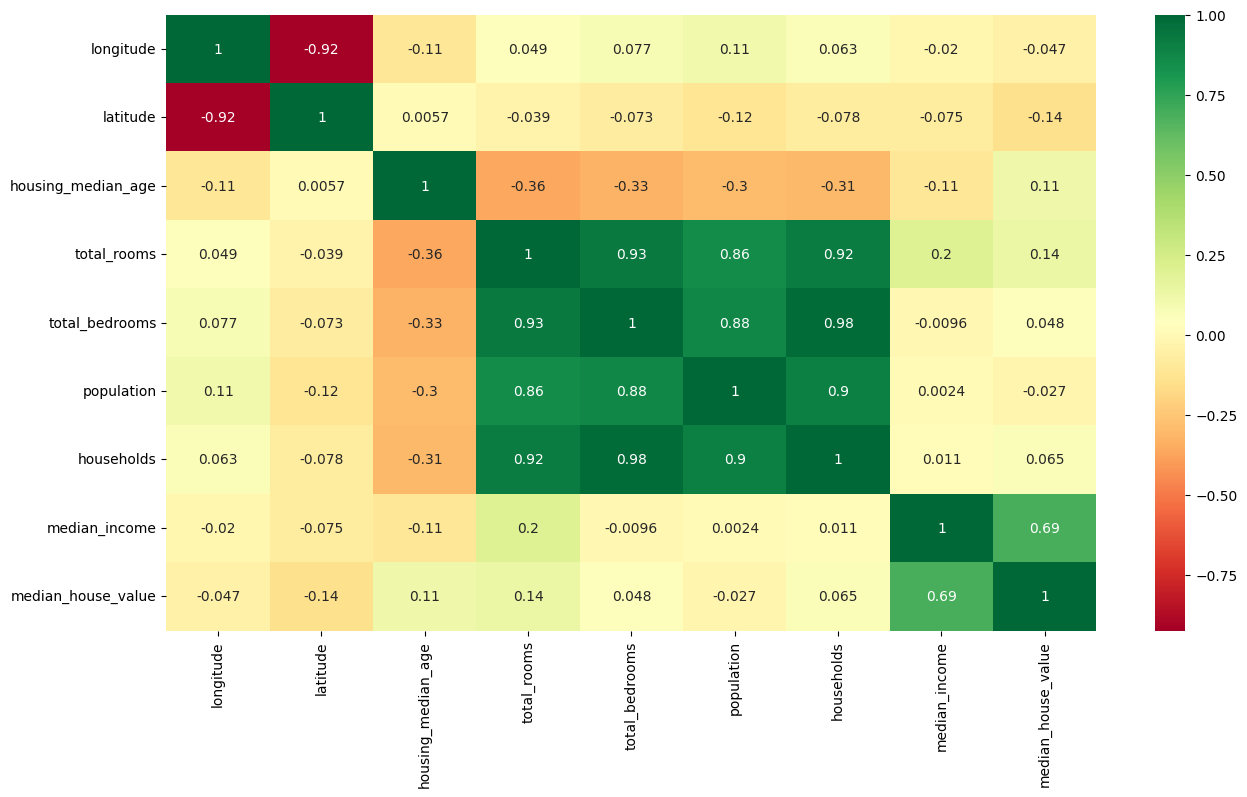

In [141]:
plt.figure(figsize=(15,8))
sns.heatmap(strat_train_set_copy.corr(),annot=True,cmap="RdYlGn")

We select features with relatively decent correlation with our label (median_house_value). This features are median_income, total_rooms, and housing_median_age

# Scatter Plot

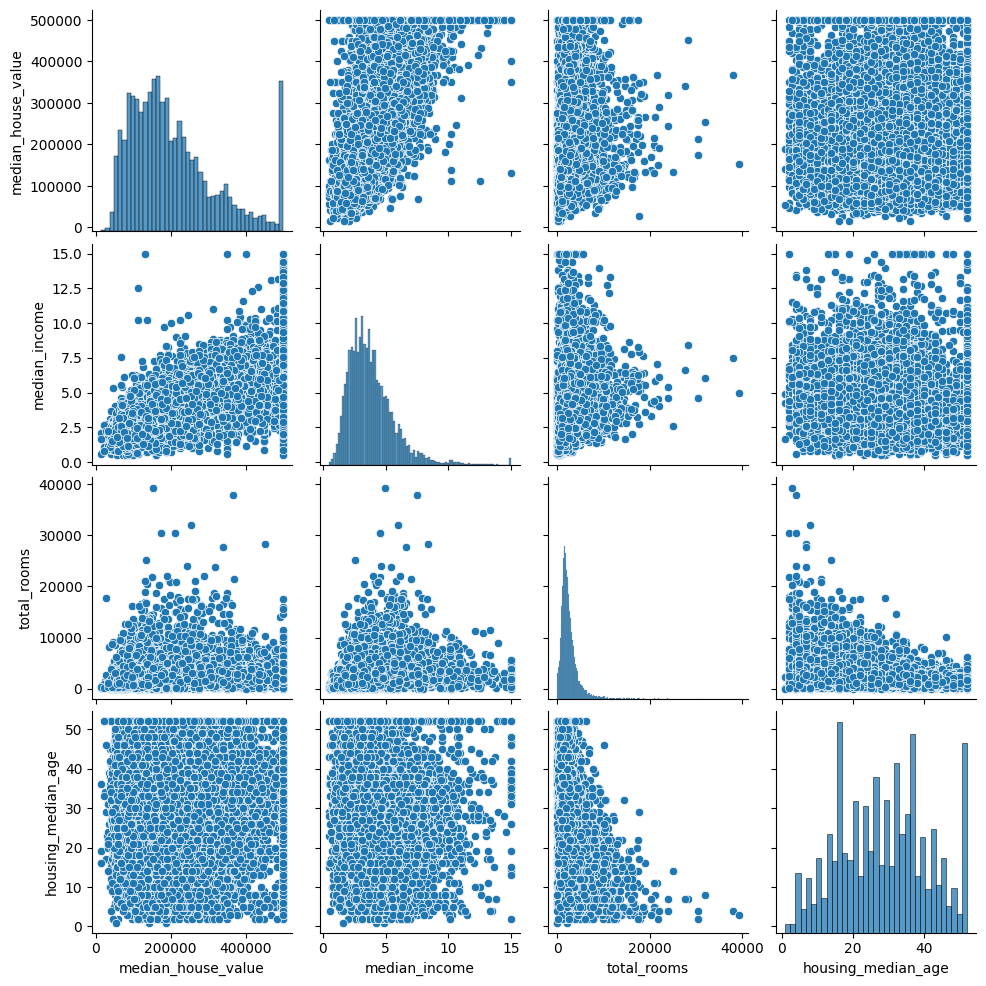

In [142]:
Relevant_Features = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
sns.pairplot(data=strat_train_set_copy[Relevant_Features])

# Split continuous and attribute features

In [143]:
strat_train_set_copy = strat_train_set_copy.copy()
strat_train_set_num = strat_train_set_copy.select_dtypes(include = ['float64'])
strat_train_set_num_features = strat_train_set_num.drop('median_house_value', axis=1)
strat_train_set_num_features.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [144]:
strat_train_set_num_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


# Data Cleaning

In [145]:
strat_train_set_num_features[strat_train_set_num['total_bedrooms'].isnull()].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580


In [146]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [147]:
imputer.fit(strat_train_set_num_features)

SimpleImputer(strategy='median')

In [148]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [149]:
imputer.strategy

'median'

In [150]:
strat_train_set_tr = imputer.transform(strat_train_set_num_features)

In [151]:
df = pd.DataFrame(strat_train_set_tr, columns = [list(strat_train_set_num_features.columns)], index = [list(strat_train_set_num_features.index)])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [153]:
strat_train_cat = strat_train_set.select_dtypes(include=['O'])
strat_train_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


# Feature Scaling

In [154]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_transformed = std_scaler.fit_transform(df)
df_transformed

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

# Encode attribute feature

## Ordinal Encoder

In [155]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
strat_train_cat_encoded = ordinal_encoder.fit_transform(strat_train_cat)
strat_train_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

## OneHot Encoder

In [156]:
from sklearn.preprocessing import OneHotEncoder

OneHot_encoder = OneHotEncoder()
strat_train_cat_OneHot = OneHot_encoder.fit_transform(strat_train_cat)
strat_train_cat_OneHot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [157]:
print(df_transformed.shape)
print(strat_train_cat_encoded.shape)
print(strat_train_cat_OneHot.shape)

(16512, 8)
(16512, 1)
(16512, 5)


# Concat continuous features and attribute feature 

In [158]:
final_train = np.concatenate((df_transformed, strat_train_cat_encoded), axis=1)
final_train

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.55628602,
        -0.8936472 ,  1.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.72131799,
         1.292168  ,  4.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.52440722,
        -0.52543365,  1.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86511838,
        -0.36547546,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.01061579,
         0.16826095,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.79857323,
        -0.390569  ,  1.        ]])

In [159]:
final_train1 = np.concatenate((df_transformed, strat_train_cat_OneHot.toarray()), axis=1)
final_train1

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [160]:
final_train_labels = strat_train_set_copy.median_house_value.copy()
final_train_labels.head(10)

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
1481     165700.0
18125    412300.0
5830     349600.0
17989    181300.0
4861     500001.0
Name: median_house_value, dtype: float64

# Predictive Modeling

## Linear Regression

In [161]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(final_train, final_train_labels)
print("Y-predict", list(lin_reg.predict(final_train))[:5])
print("Y-train", list(final_train_labels)[:5])

Y-predict [np.float64(95506.54304879223), np.float64(293131.3091054874), np.float64(176504.6701920396), np.float64(177145.84310389985), np.float64(243341.71471284592)]
Y-train [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


### Evaluation Metrics - RMSE & MAE

In [162]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(final_train)
lin_mse = mean_squared_error(final_train_labels, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(69957.31159823203)

In [163]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(final_train_labels, predictions)
lin_mae

np.float64(50972.40125162178)

### Cross Validation (Model Evaluation)

In [164]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, final_train, final_train_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

lin_reg_scores = pd.DataFrame({'Scores': list(lin_rmse_scores)})
print(lin_reg_scores)

print("Mean:", lin_rmse_scores.mean())
print("Standard deviation:", lin_rmse_scores.std())

         Scores
0  73045.723315
1  66347.945169
2  68567.267861
3  70105.768448
4  67692.134389
5  73757.829072
6  72083.175202
7  70311.449139
8  67731.717153
9  71373.976793
Mean: 70101.69865402687
Standard deviation: 2355.6629424914804


## Decision Tree

In [165]:
from sklearn.tree import DecisionTreeRegressor

DecisionTree_reg = DecisionTreeRegressor(random_state=45)
DecisionTree_reg.fit(final_train, final_train_labels)
print("Y-predict", list(DecisionTree_reg.predict(final_train))[:5])
print("Y-train", list(final_train_labels)[:5])

Y-predict [np.float64(72100.0), np.float64(279600.0), np.float64(82700.0), np.float64(112500.0), np.float64(238300.0)]
Y-train [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [166]:
predictions_DecisionTree_reg = DecisionTree_reg.predict(final_train)
DecisionTree_reg_mse = mean_squared_error(final_train_labels, predictions_DecisionTree_reg)
DecisionTree_reg_rmse = np.sqrt(DecisionTree_reg_mse)
DecisionTree_reg_rmse

np.float64(0.0)

In [167]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTree_reg, final_train, final_train_labels, scoring="neg_mean_squared_error", cv=10)
DecisionTree_reg_rmse_scores = np.sqrt(-scores)

DecisionTree_reg_scores = pd.DataFrame({'Scores': list(DecisionTree_reg_rmse_scores)})
print(DecisionTree_reg_scores)

print("Mean:", DecisionTree_reg_rmse_scores.mean())
print("Standard deviation:", DecisionTree_reg_rmse_scores.std())

         Scores
0  70095.821670
1  70772.328087
2  66312.088055
3  71016.561011
4  66318.850227
5  70622.406835
6  75134.833377
7  68439.860964
8  67895.988051
9  70040.136442
Mean: 69664.88747203352
Standard deviation: 2475.56130931178


## Random Forrest

In [168]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_reg = RandomForestRegressor(n_estimators=100, random_state=45)
RandomForest_reg.fit(final_train, final_train_labels)
print("Y-predict", list(RandomForest_reg.predict(final_train))[:5])
print("Y-train", list(final_train_labels)[:5])

Y-predict [np.float64(75879.0), np.float64(308883.01), np.float64(78041.0), np.float64(123209.0), np.float64(225332.0)]
Y-train [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [169]:
predictions_RandomForest_reg = RandomForest_reg.predict(final_train)
RandomForest_reg_rmse = mean_squared_error(final_train_labels, predictions_RandomForest_reg, squared=False)
RandomForest_reg_rmse

np.float64(18631.13858871076)

In [170]:
RandomForest_reg_mae = mean_absolute_error(final_train_labels, predictions_RandomForest_reg)
RandomForest_reg_mae

np.float64(11999.804146075581)

In [171]:
from sklearn.model_selection import cross_val_score

RandFor_scores = cross_val_score(RandomForest_reg, final_train, final_train_labels, scoring="neg_mean_squared_error", 
                                 cv=10)
RandFor_rmse_scores = np.sqrt(-RandFor_scores)

RandFor_rmse_scores_df = pd.DataFrame({'Scores': list(RandFor_rmse_scores)})
print(RandFor_rmse_scores_df)

print("Mean:", RandFor_rmse_scores.mean())
print("Standard deviation:", RandFor_rmse_scores.std())

         Scores
0  51528.881752
1  48767.589220
2  47285.419703
3  51623.298673
4  47992.119299
5  50997.004038
6  52993.948277
7  49685.665806
8  47937.840586
9  53390.636323
Mean: 50220.240367754224
Standard deviation: 2078.758106919943


## SVR

In [172]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(final_train, final_train_labels)
predictions_svm_reg = svm_reg.predict(final_train)
svm_rmse = mean_squared_error(final_train_labels, predictions_svm_reg, squared=False)
svm_rmse

np.float64(112499.73102248111)

In [173]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_reg, final_train, final_train_labels, scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)

svm_rmse_scores_df = pd.DataFrame({'Scores': list(svm_rmse_scores)})
print(svm_rmse_scores_df)

print("Mean:", svm_rmse_scores.mean())
print("Standard deviation:", svm_rmse_scores.std())

          Scores
0  111726.249837
1  114373.560143
2  108334.188565
3  114792.737175
4  109139.309324
5  117235.554680
6  114498.319943
7  113112.120175
8  114463.590047
9  113293.631341
Mean: 113096.92612308581
Standard deviation: 2563.7778346792807


# Tuning your Model

## Random Forest

### GridSearch

In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=45)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(final_train, final_train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=45),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Using GridSearch, we are able to find the best hyperparameter (n_estimators, max_features) values

In [ ]:
grid_search.best_params_

In [95]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=45)

In [103]:
best = grid_search.cv_results_
mean_score = max(best['mean_test_score'])
print(np.sqrt(-mean_score))

50064.51755639091


In [96]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.13233983, 0.12748138, 0.05271884, 0.03667127, 0.03102891,
       0.04389813, 0.02921951, 0.44324385, 0.10339828])

### RandomSearch

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=45)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=45)
rnd_search.fit(final_train, final_train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=45),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028DF931E0A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028DFFFBA670>},
                   random_state=45, scoring='neg_mean_squared_error')

In [105]:
print(rnd_search.best_params_)
print(rnd_search.best_estimator_)

{'max_features': 4, 'n_estimators': 159}
RandomForestRegressor(max_features=4, n_estimators=159, random_state=45)


In [107]:
best_rnd = rnd_search.cv_results_
mean_score_rnd = max(best_rnd['mean_test_score'])
print(np.sqrt(-mean_score_rnd))

48921.84141489697


In [122]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

48921.84141489697

Random search is better than GridSearch. Thus we will use this as our final Random Forest Model

In [195]:
X_test = strat_test_set.drop("median_house_value", axis=1)
X_test_copy = X_test.copy()
X_test_num = X_test_copy.select_dtypes(include=['float64'])
X_test_cat = X_test_copy.select_dtypes(include=['O'])
y_test = strat_test_set["median_house_value"].copy()

In [230]:
feature_importances = rnd_search.best_estimator_.feature_importances_
index = np.argpartition(np.array(feature_importances), -9)[-9:]

relevant_features = []
for i,j in zip(feature_importances, list(np.array(X_test.columns)[index])):
    k = [i,j]
    relevant_features.append(k)
X_test_features = sorted(relevant_features,reverse=True)[:4]

X_test_features_final = []
for feature in X_test_features:
    x = feature[1]
    X_test_features_final.append(x)
X_test_features_final

['median_income', 'households', 'latitude', 'ocean_proximity']

In [233]:
X_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

# Using RandomSearch Model

In [246]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
               'total_bedrooms', 'population', 'households', 'median_income'] 
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])
final_model = rnd_search.best_estimator_
final_test = full_pipeline.fit_transform(X_test)
final_test_predictions = final_model.predict(final_test)
final_test_rmse = mean_squared_error(y_test, final_test_predictions, squared=False)
final_test_rmse

51046.213280852426

# Confidence Interval

## t-test

In [247]:
from scipy import stats

confidence = 0.95
squared_errors = (final_test_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([49191.14439956, 52836.19113156])

With 95% confidence, the true rmse is between this interval

## z-test

In [248]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(49191.144399558216, 52836.19113155655)

With 95% confidence, the true rmse is between this interval

# Testing the Model

In [283]:
X_test['ocean_proximity'].value_counts()

<1H OCEAN     1859
INLAND        1289
NEAR OCEAN     534
NEAR BAY       443
ISLAND           3
Name: ocean_proximity, dtype: int64

In [319]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,NEAR OCEAN


In [326]:
final_values = []
for col in list(X_test.columns[:8]):
    values = float(input(f"{col}: "))
    final_values.append(values)
final_values

col_cat = X_test.columns[-1]
value_cat = input(f"{col_cat}: ")
final_values.append(value_cat)

final_values

longitude: -118.7
latitude: 34.12
housing_median_age: 24
total_rooms: 2020
total_bedrooms: 1456
population: 267
households: 301
median_income: 3.245
ocean_proximity: NEAR OCEAN


[-118.7, 34.12, 24.0, 2020.0, 1456.0, 267.0, 301.0, 3.245, 'NEAR OCEAN']

In [332]:
prototype_values = pd.DataFrame(final_values, index=list(X_test.columns)).transpose()
prototype_values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-118.7,34.12,24.0,2020.0,1456.0,267.0,301.0,3.245,NEAR OCEAN


In [335]:
num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
               'total_bedrooms', 'population', 'households', 'median_income'] 
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])
final_model = rnd_search.best_estimator_
final_test = full_pipeline.fit_transform(prototype_values)
final_test_predictions = final_model.predict(final_test)
print(f"Median House Value: {final_test_predictions}")

Median House Value: [226188.10691824]


# Saving the model

In [336]:
import pickle

with open('C:/Users/Randy/Downloads/IE things/ML Models/California_Housing_Prediction.pkl', 'wb') as f:
    pickle.dump(final_model, f)